In [1]:
# First time Kaggle user trying some random stuff to get a feel :)
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.
rm(list = ls()) 
library(dplyr)
library(ggplot2)
library(readr)
library(class)
library(gmodels)
wbd <- read.csv("../input/wisc_bc_data.csv")
wbd = wbd %>% select(-id)
glimpse(wbd)





Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Observations: 569
Variables: 31
$ diagnosis               <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M...
$ radius_mean             <dbl> 17.990, 20.570, 19.690, 11.420, 20.290, 12....
$ texture_mean            <dbl> 10.38, 17.77, 21.25, 20.38, 14.34, 15.70, 1...
$ perimeter_mean          <dbl> 122.80, 132.90, 130.00, 77.58, 135.10, 82.5...
$ area_mean               <dbl> 1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477....
$ smoothness_mean         <dbl> 0.11840, 0.08474, 0.10960, 0.14250, 0.10030...
$ compactness_mean        <dbl> 0.27760, 0.07864, 0.15990, 0.28390, 0.13280...
$ concavity_mean          <dbl> 0.30010, 0.08690, 0.19740, 0.24140, 0.19800...
$ concave.points_mean     <dbl> 0.14710, 0.07017, 0.12790, 0.10520, 0.10430...
$ symmetry_mean           <dbl> 0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.2...
$ fractal_dimension_mean  <dbl> 0.07871, 0.05667, 0.05999, 0.09744, 0.05883...
$ radius_se               <dbl> 1.0950, 0.5435, 0.7456, 0.4956, 0.7572, 0.3...
$ texture_se        

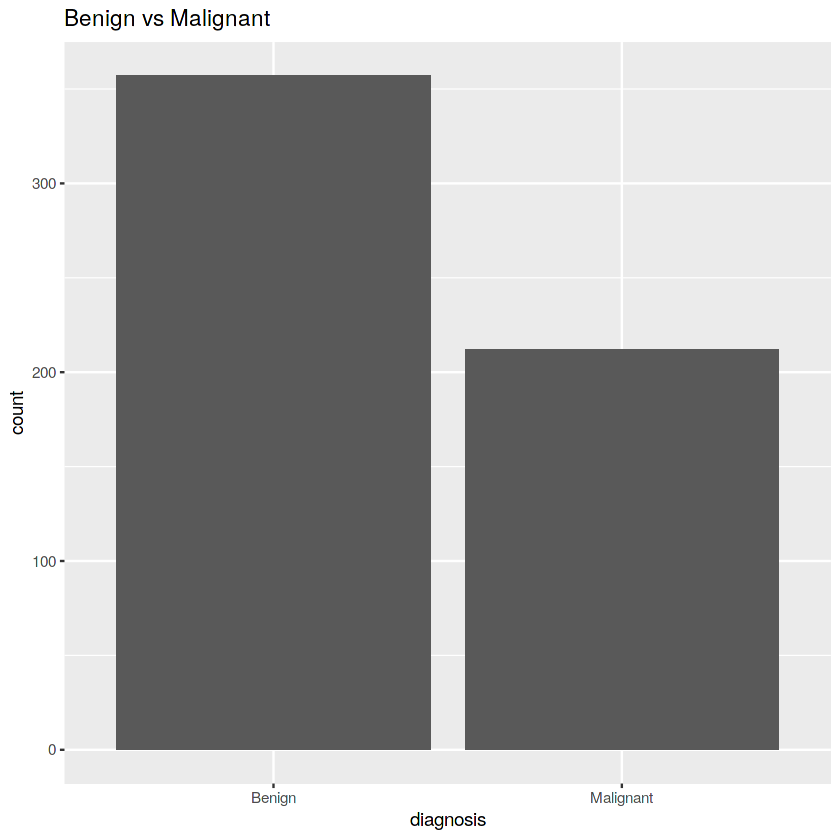

In [2]:
wbd$diagnosis <- factor(wbd$diagnosis, levels = c("B", "M"), labels = c("Benign", "Malignant"))
ggplot(wbd, aes(x = diagnosis)) + geom_bar() + ggtitle("Benign vs Malignant")

In [3]:
prop.table(table(wbd$diagnosis)) * 100


   Benign Malignant 
 62.74165  37.25835 

In [4]:
normal = function(x){
  return((x - min(x)) / (max(x) - min(x)))
}
wbd_n = as.data.frame(lapply(wbd[2:31], normal))
glimpse(wbd_n)
wbd_train = wbd_n[1:469,]
wbd_test = wbd_n[470:569,]

wbd_train_labels <- wbd[1:469, 1]
wbd_test_labels <- wbd[470:569, 1]
glimpse(wbd_train)

Observations: 569
Variables: 30
$ radius_mean             <dbl> 0.5210374, 0.6431445, 0.6014956, 0.2100904,...
$ texture_mean            <dbl> 0.0226581, 0.2725736, 0.3902604, 0.3608387,...
$ perimeter_mean          <dbl> 0.5459885, 0.6157833, 0.5957432, 0.2335015,...
$ area_mean               <dbl> 0.36373277, 0.50159067, 0.44941676, 0.10290...
$ smoothness_mean         <dbl> 0.5937528, 0.2898799, 0.5143089, 0.8113208,...
$ compactness_mean        <dbl> 0.7920373, 0.1817680, 0.4310165, 0.8113613,...
$ concavity_mean          <dbl> 0.70313964, 0.20360825, 0.46251172, 0.56560...
$ concave.points_mean     <dbl> 0.7311133, 0.3487575, 0.6356859, 0.5228628,...
$ symmetry_mean           <dbl> 0.6863636, 0.3797980, 0.5095960, 0.7762626,...
$ fractal_dimension_mean  <dbl> 0.60551811, 0.14132266, 0.21124684, 1.00000...
$ radius_se               <dbl> 0.35614702, 0.15643672, 0.22962158, 0.13909...
$ texture_se              <dbl> 0.12046941, 0.08258929, 0.09430251, 0.17587...
$ perimeter_se      

In [5]:
wbd_test_pred <- knn(wbd_train, wbd_test, wbd_train_labels, k = 21) # with K = 21
wbd_test_pred
CrossTable(x = wbd_test_labels, y = wbd_test_pred, prop.chisq=FALSE)
# Accuracy of 98%

[1] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
  [8] Benign    Benign    Benign    Malignant Benign    Benign    Benign   
 [15] Benign    Benign    Benign    Benign    Malignant Benign    Benign   
 [22] Benign    Benign    Malignant Benign    Benign    Benign    Benign   
 [29] Benign    Malignant Malignant Benign    Malignant Benign    Malignant
 [36] Benign    Benign    Benign    Benign    Benign    Malignant Benign   
 [43] Benign    Malignant Benign    Benign    Benign    Malignant Malignant
 [50] Benign    Benign    Benign    Malignant Benign    Benign    Benign   
 [57] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
 [64] Benign    Malignant Benign    Malignant Malignant Benign    Benign   
 [71] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
 [78] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
 [85] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
 [92] Benign    Benign    Malignant Malignant Malignant Malignant Malignant
 [99] Malignant Benign   
Levels: Benign Malignant


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
                | wbd_test_pred 
wbd_test_labels |    Benign | Malignant | Row Total | 
----------------|-----------|-----------|-----------|
         Benign |        77 |         0 |        77 | 
                |     1.000 |     0.000 |     0.770 | 
                |     0.975 |     0.000 |           | 
                |     0.770 |     0.000 |           | 
----------------|-----------|-----------|-----------|
      Malignant |         2 |        21 |        23 | 
                |     0.087 |     0.913 |     0.230 | 
                |     0.025 |     1.000 |           | 
                |     0.020 |     0.210 |           | 
----------------|-----------|-----------|-----------|
   Column Total |        79 |        21 |       100 | 
                |     0.79